# Ejercicio Grupo E8FP

**Integrantes:**
- Maxim Polyak
- Jesús Gómez

## Objetivo
Dar experiencia en manejo de datos EMG y clasificación de gestos de mano, incluyendo gráficos para visualizar resultados.

## Importación de librerías

In [11]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Carga y preparación de datos

In [12]:
file_paths = glob.glob('data/HandGesture*.csv')
dfs = [pd.read_csv(fp, header=None) for fp in file_paths]
df = pd.concat(dfs, ignore_index=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Datos cargados:', df.shape)

Datos cargados: (11678, 65)


## División del conjunto de datos (80% entrenamiento, 20% testeo)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Tamaño entrenamiento:', X_train.shape)
print('Tamaño testeo:', X_test.shape)

Tamaño entrenamiento: (9342, 64)
Tamaño testeo: (2336, 64)


## Análisis Exploratorio de Datos (EDA)

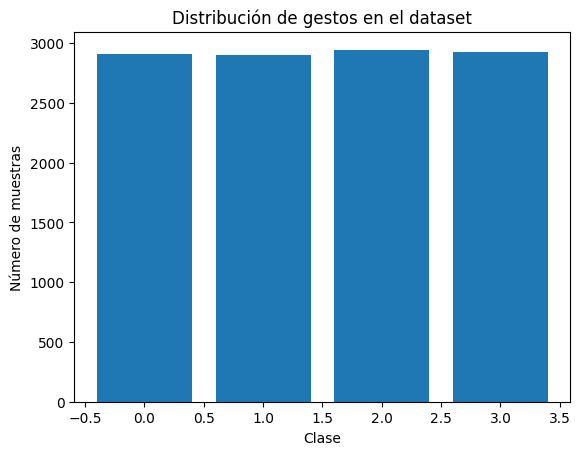

In [14]:
# Distribución de clases
class_counts = y.value_counts().sort_index()
plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de gestos en el dataset')
plt.show()

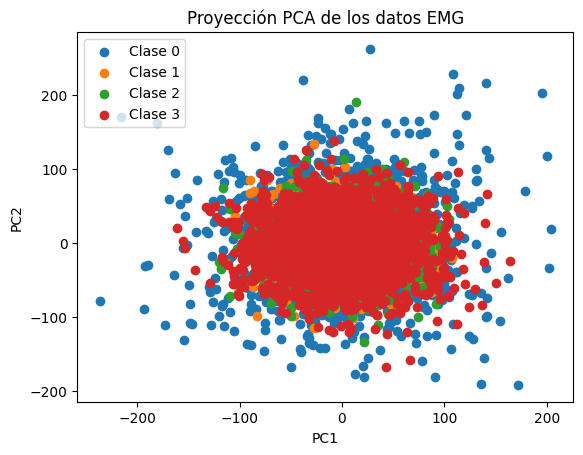

In [15]:
# Scatter 2D tras PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure()
for cls in sorted(y.unique()):
    mask = (y == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Clase {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA de los datos EMG')
plt.legend()
plt.show()

## Entrenamiento y evaluación de modelos

In [16]:
# Definir y entrenar modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}
results = {}
preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    preds[name] = y_pred
    print(f"Accuracy {name}: {results[name]:.4f}")
    print(classification_report(y_test, y_pred))

Accuracy Random Forest: 0.9225
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       582
           1       0.96      0.92      0.94       581
           2       0.92      0.93      0.92       589
           3       0.90      0.87      0.89       584

    accuracy                           0.92      2336
   macro avg       0.92      0.92      0.92      2336
weighted avg       0.92      0.92      0.92      2336

Accuracy LDA: 0.3390
              precision    recall  f1-score   support

           0       0.51      0.41      0.46       582
           1       0.32      0.35      0.34       581
           2       0.25      0.28      0.26       589
           3       0.32      0.31      0.32       584

    accuracy                           0.34      2336
   macro avg       0.35      0.34      0.34      2336
weighted avg       0.35      0.34      0.34      2336

Accuracy QDA: 0.9358
              precision    recall  f1-score   support

  

## Comparativa de accuracy

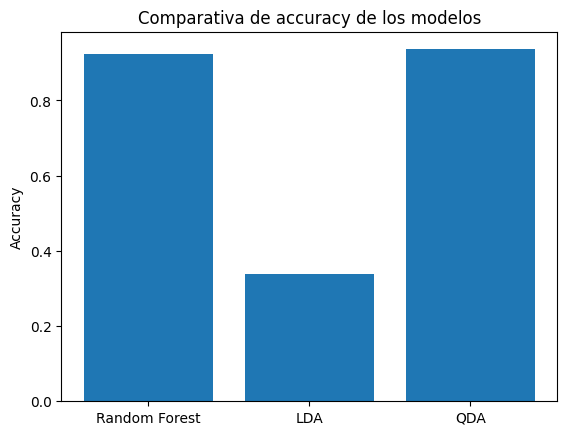

In [17]:
plt.figure()
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Comparativa de accuracy de los modelos')
plt.show()

## Matriz de confusión del mejor modelo (QDA)

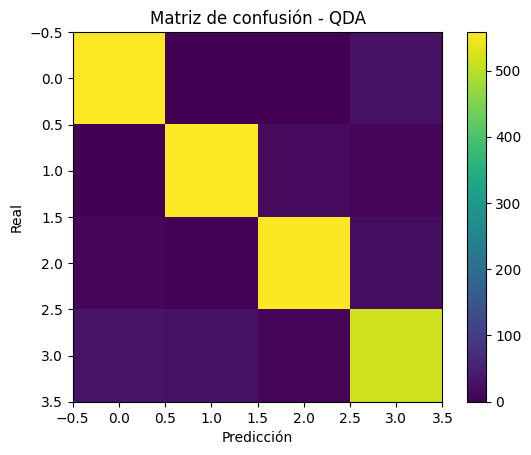

In [18]:
cm = confusion_matrix(y_test, preds['QDA'])
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Matriz de confusión - QDA')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.colorbar()
plt.show()

## Conclusiones

- El modelo **QDA** obtuvo la mejor precisión (~94 %), seguido de **Random Forest** (~92 %).
- **LDA** no funcionó adecuadamente con estos datos (~34 % de accuracy), por lo que no es recomendable.
- La PCA muestra que las clases están relativamente bien separadas en dos dimensiones.
- En producción, **QDA** sería la primera opción, aunque **Random Forest** es más robusto frente al ruido.
- Futuras mejoras: aumentar muestras del gesto con menor recall o diseñar nuevas características basadas en EMG.